# Assignment 0: Data Prep

One of the most important (and usually time consuming!) steps in the data science process is data pre-processing. 

Data prep includes:
* Data exploration  
* Data cleaning
* Feature engineering

In this assignment, you will do a little of each of these things. 

## Part 1: Leaf Dataset

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [67]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__ #print which version of pandas you're using

'1.3.5'

Read in the dataset. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [68]:
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head()

class  eccentricity  aspect-ratio  ...  third-moment  uniformity  entropy
0      1           NaN        1.0118  ...      0.002273    0.000175  0.86000
1      4       0.99512       10.3770  ...      0.001266    0.000170  0.71514
2      3       0.19287        1.0551  ...      0.004583    0.000440  1.41110
3      1       0.52212        1.1191  ...      0.002179    0.000149  0.82809
4      3       0.33254        1.1208  ...      0.005981    0.001234  2.48660

[5 rows x 15 columns]

Q1. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. How many missing values are there in this column?

In [69]:
# your code goes here
# The number of missing values is 5
leaf_data['eccentricity'].isna().sum()

5

Q2. Fill in these missing values with something reasonable. Show the head of the dataframe.

In [70]:
# your code goes here
# Filled in with the median eccentricity values based on class attribute
leaf_data['eccentricity'].fillna(leaf_data.groupby('class')['eccentricity'].transform("median"), inplace=True)
leaf_data.head()

class  eccentricity  aspect-ratio  ...  third-moment  uniformity  entropy
0      1       0.40420        1.0118  ...      0.002273    0.000175  0.86000
1      4       0.99512       10.3770  ...      0.001266    0.000170  0.71514
2      3       0.19287        1.0551  ...      0.004583    0.000440  1.41110
3      1       0.52212        1.1191  ...      0.002179    0.000149  0.82809
4      3       0.33254        1.1208  ...      0.005981    0.001234  2.48660

[5 rows x 15 columns]

Q3. Create a scatter plot between `smoothness` and `eccentricity`. Place `smoothness` on the X axis.

Text(0.5, 1.0, 'Smoothness vs Eccentricity')

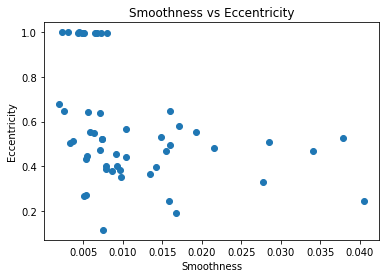

In [71]:
# your code goes here
plt.scatter(leaf_data['smoothness'], leaf_data['eccentricity'])
plt.xlabel("Smoothness")
plt.ylabel("Eccentricity")
plt.title("Smoothness vs Eccentricity")


Q4. Now plot the same scatter plot as Q4 but give a different color to each `class` label. What can you infer from this plot? (Provide a short answer in the form of comments.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


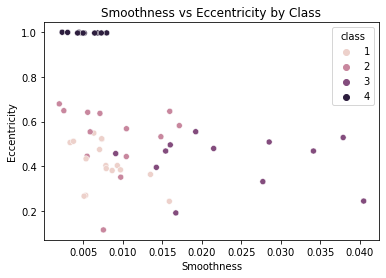

In [72]:
# your code goes here
sns.scatterplot('smoothness', 'eccentricity', data=leaf_data, hue='class')
plt.xlabel("Smoothness")
plt.ylabel("Eccentricity")
plt.title("Smoothness vs Eccentricity by Class")
plt.show()
# We can reasonably infer that class 4 leaves will pretty much always have an eccentricity value at or near 1.
# Also, Class 3 leaves appear to be wide ranging in terms of their smoothness as it goes from like 0.005 to 0.040. Their eccentricity appears to range from
# 0.2 to 0.5. CLass 2 and class 1 leaves appear pretty similar expect class 2 leaves 
# seem to have a slightly greater range with regards to eccentricity.
# It overall seems that for all the other classes, except for class 4 leaves, that, in general,
# as the smoothness gets larger, the corresponding eccentricity gets smaller and vice versa.

Q5. Calculate the correlation coefficient between the `eccentricity` and the `smoothness` column. What does this number tell us? (Provide a short answer in the form of comments.)

In [73]:
# your code goes here
correlation_coefficient = leaf_data['eccentricity'].corr(leaf_data['smoothness'])
print(correlation_coefficient)
# Since the coefficient is moderately negative, that means there is a moderate negative correlation where 
# it appears as smoothness gets greater, the eccentricity goes down and vice versa. This direct relationship
# isn't strong however, but it is noticeable.


-0.37480970713070516


Q6. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

Text(0, 0.5, 'Average-Contrast')

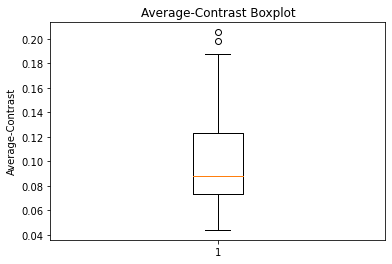

In [74]:
# your code goes here
plt.boxplot(leaf_data['average-contrast'])
plt.title("Average-Contrast Boxplot")
plt.ylabel("Average-Contrast")
# There appear to be a couple of outliers as indicated by the two circles at the top of plot

Q7. Data scaling

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [75]:
import sklearn
from sklearn.preprocessing import StandardScaler
# your code goes here
scaler = StandardScaler()
scaled_data = scaler.fit_transform(leaf_data)
scaled_data_frame = pd.DataFrame(scaled_data, columns=leaf_data.columns)
print(scaled_data_frame.mean(axis=0))
print(scaled_data_frame.std(axis=0))
scaled_data_frame.head()


class                       -6.191628e-17
eccentricity                -2.439288e-16
aspect-ratio                -5.337611e-18
elongation                   2.668805e-16
solidity                     7.387253e-16
stochastic-convexity         5.487064e-16
isoperimetric-factor         1.654659e-16
maximal-indentation-depth    1.643984e-16
lobedness                    8.113168e-17
average-intensity           -2.049643e-16
average-contrast            -4.782499e-16
smoothness                   2.562053e-17
third-moment                -1.195625e-16
uniformity                   0.000000e+00
entropy                     -5.124106e-17
dtype: float64
class                        1.009756
eccentricity                 1.009756
aspect-ratio                 1.009756
elongation                   1.009756
solidity                     1.009756
stochastic-convexity         1.009756
isoperimetric-factor         1.009756
maximal-indentation-depth    1.009756
lobedness                    1.009756
average-inten

class  eccentricity  aspect-ratio  ...  third-moment  uniformity   entropy
0 -1.196975     -0.660841     -0.531196  ...     -0.335186   -0.446737 -0.263256
1  1.470569      1.710985      1.447597  ...     -0.813314   -0.456439 -0.533339
2  0.581388     -1.509074     -0.522047  ...      0.761190    0.043125  0.764238
3 -1.196975     -0.187536     -0.508525  ...     -0.379852   -0.496638 -0.322750
4  0.581388     -0.948469     -0.508165  ...      1.424579    1.512359  2.769444

[5 rows x 15 columns]

Q8. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensionsare necessary to retain 95% of the variance. 
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform). 
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [76]:
# your code goes here
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, svd_solver='full')
reduced_data = pca.fit_transform(scaled_data_frame)
pca_data_frame = pd.DataFrame(reduced_data)
pca_data_frame.head()

0         1         2         3
0 -1.832225 -1.901642  0.032324  0.107925
1 -1.358500  3.252205 -1.219972 -0.236422
2  2.407500 -0.229934  0.516384  1.125512
3 -2.656967 -2.445868 -0.462220 -0.223461
4  4.906739 -1.137479 -1.207474 -0.138373

## Part 2: Adult Census Dataset

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a description of the dataset [here](https://archive.ics.uci.edu/ml/datasets/Adult).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

Read in the data. You can find more on reading CSV (Comma Separated Value) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [77]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
print(adult_data.shape)
# show the head of the data (first 5 values)
adult_data.head()

(32561, 14)


age         workclass    education  ...  hours-per-week native-country income
0   39         State-gov    Bachelors  ...              40  United-States  <=50K
1   50  Self-emp-not-inc    Bachelors  ...              13  United-States  <=50K
2   38           Private      HS-grad  ...              40  United-States  <=50K
3   53           Private  High-school  ...              40  United-States  <=50K
4   28           Private    Bachelors  ...              40           Cuba  <=50K

[5 rows x 14 columns]

In [78]:
# display data types of various columns in the dataframe
adult_data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Q9. Show the distribution of the dataset with respect to the `education` column (how many people have each level of education). Choose a plot that is suitable to show this.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

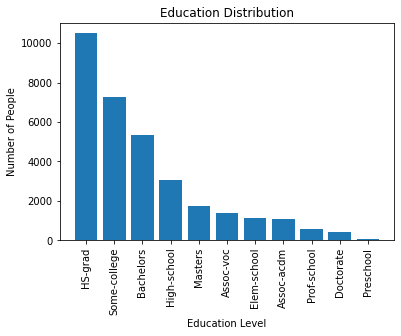

In [79]:
labels = ["HS-grad", "Some-college", "Bachelors", "High-school", "Masters", 
          'Assoc-voc', 'Elem-school', 'Assoc-acdm', 'Prof-school', 'Doctorate',
          'Preschool']
plt.bar(labels, adult_data['education'].value_counts())
plt.title("Education Distribution")
plt.ylabel("Number of People")
plt.xlabel("Education Level")
plt.xticks(rotation=90) 

Q10.
* Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
* Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` category.
* As a comment, note which marital status category has the maximum average work hours per week? Which has the most variability in work hours per week? 

In [80]:
# your code here
mean_stats = adult_data.groupby('marital-status')['hours-per-week'].mean()
print(mean_stats, "\n")
median_stats = adult_data.groupby('marital-status')['hours-per-week'].median()
print(median_stats, "\n")
standard_deviation_stats = adult_data.groupby('marital-status')['hours-per-week'].std()
print(standard_deviation_stats, "\n")

# The marital status category with the maximum average work hours per week is Married-civ-spouse.
# Meanwhile, the marital status category with the most variability in work hours per week is Married-Af-spouse.

marital-status
Divorced                 41.246680
Married-AF-spouse        41.130435
Married-civ-spouse       43.284856
Married-spouse-absent    39.669856
Never-married            36.939998
Separated                39.301463
Widowed                  32.979859
Name: hours-per-week, dtype: float64 

marital-status
Divorced                 40.0
Married-AF-spouse        40.0
Married-civ-spouse       40.0
Married-spouse-absent    40.0
Never-married            40.0
Separated                40.0
Widowed                  40.0
Name: hours-per-week, dtype: float64 

marital-status
Divorced                 10.676632
Married-AF-spouse        19.440596
Married-civ-spouse       11.905047
Married-spouse-absent    11.767374
Never-married            12.432542
Separated                10.377534
Widowed                  14.058690
Name: hours-per-week, dtype: float64 



In [81]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q11. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [82]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# add the new column to adult_data_copy
# your code goes here
adult_data_copy['continent'] = adult_data_copy['native-country'].map(continent_dict)
adult_data_copy.head()


age         workclass    education  ...  native-country income      continent
0   39         State-gov    Bachelors  ...   United-States  <=50K  North-America
1   50  Self-emp-not-inc    Bachelors  ...   United-States  <=50K  North-America
2   38           Private      HS-grad  ...   United-States  <=50K  North-America
3   53           Private  High-school  ...   United-States  <=50K  North-America
4   28           Private    Bachelors  ...            Cuba  <=50K  North-America

[5 rows x 15 columns]

Q12. Create a bar graph showing the average age of adults from each continent, and show the standard deviation on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen5.png" width=200>

Text(0, 0.5, 'Age')

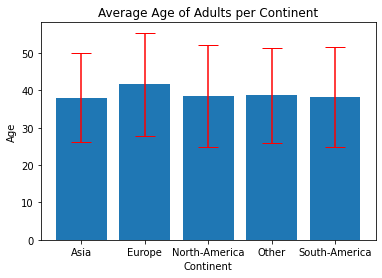

In [83]:
# your code goes here
import numpy as np
fig, ax = plt.subplots()
north_america_std = np.std(adult_data_copy[adult_data_copy['continent'] == 'North-America']['age'])
asia_std = np.std(adult_data_copy[adult_data_copy['continent'] == 'Asia']['age'])
other_std = np.std(adult_data_copy[adult_data_copy['continent'] == 'Other']['age'])
europe_std = np.std(adult_data_copy[adult_data_copy['continent'] == 'Europe']['age'])
south_america_std = np.std(adult_data_copy[adult_data_copy['continent'] == 'South-America']['age'])
std_list = [asia_std, europe_std, north_america_std, other_std, south_america_std]
labels = ['Asia', 'Europe', 'North-America', 'Other', 'South-America']
ax.bar(labels,adult_data_copy.groupby('continent')['age'].mean(), yerr=std_list,ecolor='red', capsize=10)
plt.title("Average Age of Adults per Continent")
plt.xlabel("Continent")
plt.ylabel("Age")


Q13. To reduce the dimensionality of this dataset using feature selection, which attribute or attributes would you eliminate? Explain why.

In [84]:
# '''Explain why here (as a comment): 
# I would eliminate both the capital loss and capital gain attributes and just have them merged together to form
# a new feature or column called capital profit such that the capital loss values are multiplied by -1
# to imply a negative profit, while the capital gain values remain the same as they reflect a positive profit. I would also remove
# both the continent and native-country features/columns. For the continent column, 93.88 percent of the values are North-America 
# while for the native-country column, 89.59% of the values are United-States. Due to the low variance in terms of values seen, I believe
# these columns should be removed. The same goes for the race column/feature as 85% of the values are White, so there is low variance in terms 
# of values seen. 
# '''